In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('badminton_dataset.csv')

label_encoder = LabelEncoder()

df['Outlook'] = label_encoder.fit_transform(df['Outlook'])
df['Temperature'] = label_encoder.fit_transform(df['Temperature'])
df['Humidity'] = label_encoder.fit_transform(df['Humidity'])
df['Wind'] = label_encoder.fit_transform(df['Wind'])
df['Play_Badminton'] = label_encoder.fit_transform(df['Play_Badminton'])

X = df.drop(columns=['Play_Badminton'])
y = df['Play_Badminton']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)


Saving badminton_dataset.csv to badminton_dataset.csv
Accuracy: 75.00%
Confusion Matrix:
[[3 2]
 [0 3]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('badminton_dataset.csv')

outlook_encoder = LabelEncoder()
temperature_encoder = LabelEncoder()
humidity_encoder = LabelEncoder()
wind_encoder = LabelEncoder()
play_encoder = LabelEncoder()

df['Outlook'] = outlook_encoder.fit_transform(df['Outlook'])
df['Temperature'] = temperature_encoder.fit_transform(df['Temperature'])
df['Humidity'] = humidity_encoder.fit_transform(df['Humidity'])
df['Wind'] = wind_encoder.fit_transform(df['Wind'])
df['Play_Badminton'] = play_encoder.fit_transform(df['Play_Badminton'])

X = df.drop(columns=['Play_Badminton'])
y = df['Play_Badminton']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

def predict_play_badminton(outlook, temperature, humidity, wind):

    outlook_encoded = outlook_encoder.transform([outlook])[0]
    temperature_encoded = temperature_encoder.transform([temperature])[0]
    humidity_encoded = humidity_encoder.transform([humidity])[0]
    wind_encoded = wind_encoder.transform([wind])[0]

    input_data = pd.DataFrame([[outlook_encoded, temperature_encoded, humidity_encoded, wind_encoded]],
                              columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

    prediction = gnb.predict(input_data)

    return play_encoder.inverse_transform(prediction)[0]

outlook_input = input("Enter Outlook (Sunny/Overcast/Rain): ")
temperature_input = input("Enter Temperature (Hot/Mild/Cool): ")
humidity_input = input("Enter Humidity (High/Normal): ")
wind_input = input("Enter Wind (Weak/Strong): ")

result = predict_play_badminton(outlook_input, temperature_input, humidity_input, wind_input)
print(f"Prediction: Will they play badminton? {result}")

Saving badminton_dataset.csv to badminton_dataset (3).csv
Accuracy: 75.00%
Confusion Matrix:
[[3 2]
 [0 3]]
Enter Outlook (Sunny/Overcast/Rain): Sunny
Enter Temperature (Hot/Mild/Cool): Mild
Enter Humidity (High/Normal): High
Enter Wind (Weak/Strong): Strong
Prediction: Will they play badminton? No


Saving badminton_dataset.csv to badminton_dataset (9).csv
Dataset preview:
    Outlook Temperature Humidity    Wind Play_Badminton
0  Overcast        Cool     High    Weak            Yes
1     Sunny        Mild   Normal  Strong             No
2      Rain        Mild   Normal  Strong             No
3     Sunny        Cool     High    Weak            Yes
4     Sunny        Cool     High  Strong             No


<ipython-input-11-d41b6d0ad949>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Play_Badminton', palette='Set2')


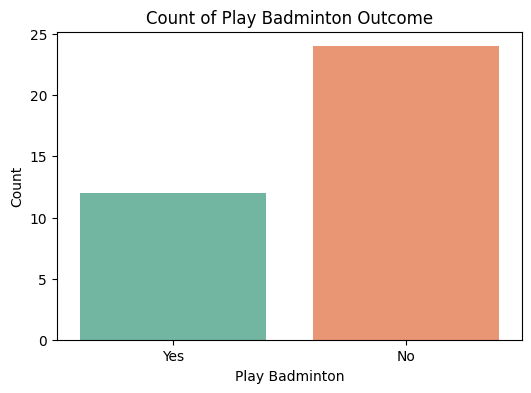

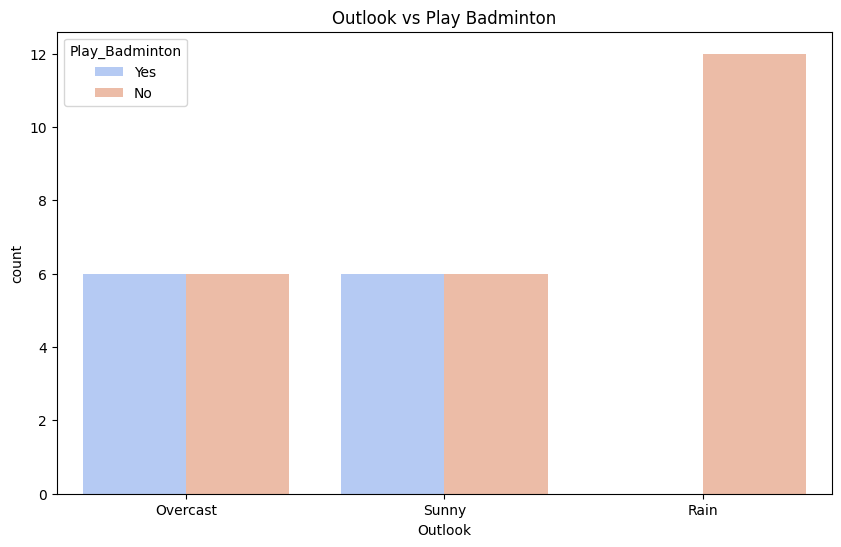

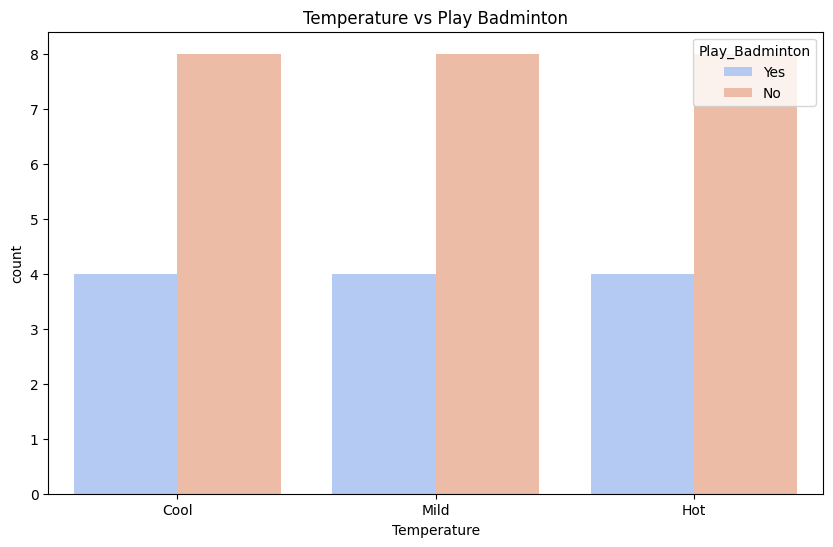

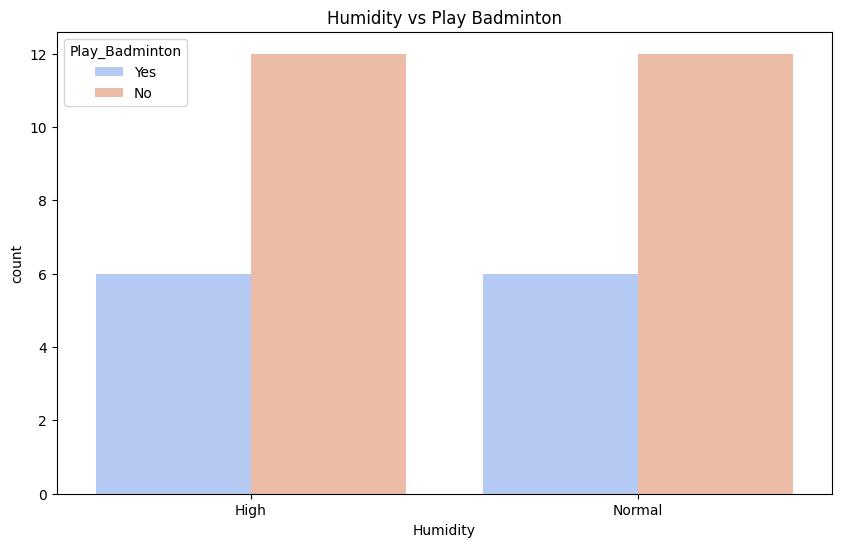

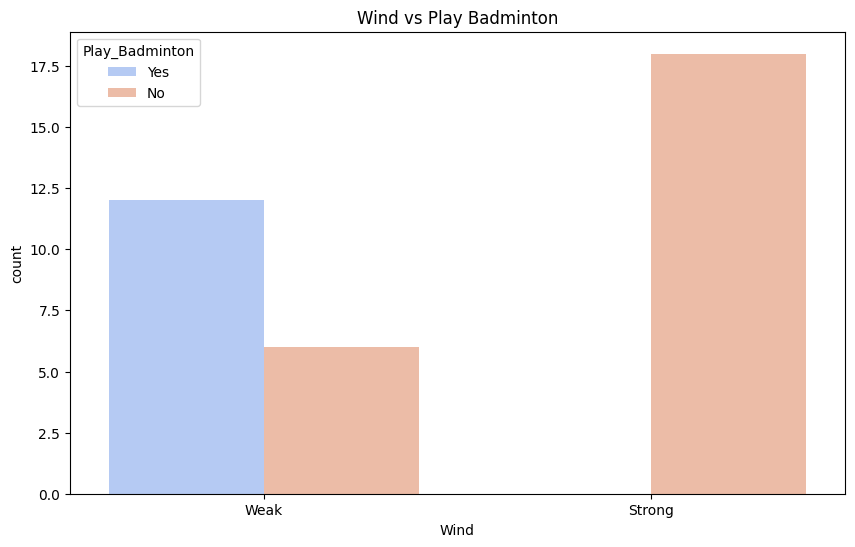

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('badminton_dataset.csv')

print("Dataset preview:")
print(df.head())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Play_Badminton', palette='Set2')
plt.title('Count of Play Badminton Outcome')
plt.xlabel('Play Badminton')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Outlook', hue='Play_Badminton', palette='coolwarm')
plt.title('Outlook vs Play Badminton')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Temperature', hue='Play_Badminton', palette='coolwarm')
plt.title('Temperature vs Play Badminton')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Humidity', hue='Play_Badminton', palette='coolwarm')
plt.title('Humidity vs Play Badminton')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Wind', hue='Play_Badminton', palette='coolwarm')
plt.title('Wind vs Play Badminton')
plt.show()